In [87]:
import pandas as pd


ratings = pd.read_csv('ml-latest-small/ratings.csv')
movies = pd.read_csv('ml-latest-small/movies.csv')

# Merge datasets if needed
df_merged = pd.merge(ratings, movies, on='movieId')


In [88]:
df_merged.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


User based collaborative filtering

In [89]:
df = df_merged.groupby(['title', 'genres'])['rating'].mean().reset_index()
df.head()

,title,genres,rating
0,'71 (2014),Action|Drama|Thriller|War,4.0
1,'Hellboy': The Seeds of Creation (2004),Action|Adventure|Comedy|Documentary|Fantasy,4.0
2,'Round Midnight (1986),Drama|Musical,3.5
3,'Salem's Lot (2004),Drama|Horror|Mystery|Thriller,5.0
4,'Til There Was You (1997),Drama|Romance,4.0


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9724 entries, 0 to 9723
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   9724 non-null   object 
 1   genres  9724 non-null   object 
 2   rating  9724 non-null   float64
dtypes: float64(1), object(2)
memory usage: 228.0+ KB


Tfidf method

In [91]:
# Using tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['genres'])
tfidf_matrix.shape

(9724, 23)

In [92]:
# computing similarity
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim.shape

(9724, 9724)

In [93]:
cosine_sim

array([[1.        , 0.17081523, 0.11588899, ..., 0.48753182, 0.        ,
        0.        ],
       [0.17081523, 1.        , 0.        , ..., 0.20859896, 0.09996509,
        0.11321866],
       [0.11588899, 0.        , 1.        , ..., 0.        , 0.        ,
        0.84401888],
       ...,
       [0.48753182, 0.20859896, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.09996509, 0.        , ..., 0.        , 1.        ,
        0.14677593],
       [0.        , 0.11321866, 0.84401888, ..., 0.        , 0.14677593,
        1.        ]])

In [94]:
def recommend(title):
    idx = df.loc[df['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[movie_indices]

In [95]:
recommend('Toy Story (1995)')

553                                           Antz (1998)
639     Asterix and the Vikings (Astérix et les Viking...
2726                     Emperor's New Groove, The (2000)
5733                                         Moana (2016)
5779                                Monsters, Inc. (2001)
7661                               Shrek the Third (2007)
8288                       Tale of Despereaux, The (2008)
8494                             The Good Dinosaur (2015)
8875                                     Toy Story (1995)
8876                                   Toy Story 2 (1999)
Name: title, dtype: object

Item based similarity

In [97]:
# Create a pivot table with users as rows, movies as columns, and ratings as values
pivot_table = ratings.pivot(index='userId', columns='movieId', values='rating')

# Compute the Pearson correlation matrix
item_item_similarity = pivot_table.corr(method='pearson')
item_item_similarity.fillna(0, inplace=True)
item_item_similarity.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.330978,0.487109,1.000000,0.310971,0.106465,0.208402,0.968246,0.095913,-0.021409,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.330978,1.000000,0.419564,0.000000,0.562791,0.163510,0.430261,0.415227,0.277350,0.016626,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.487109,0.419564,1.000000,0.000000,0.602266,0.345069,0.554088,0.333333,0.458591,-0.050276,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.000000,0.000000,1.000000,0.654654,0.000000,0.203653,0.000000,0.000000,0.870388,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.310971,0.562791,0.602266,0.654654,1.000000,0.291302,0.609119,0.555556,0.319173,0.218263,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


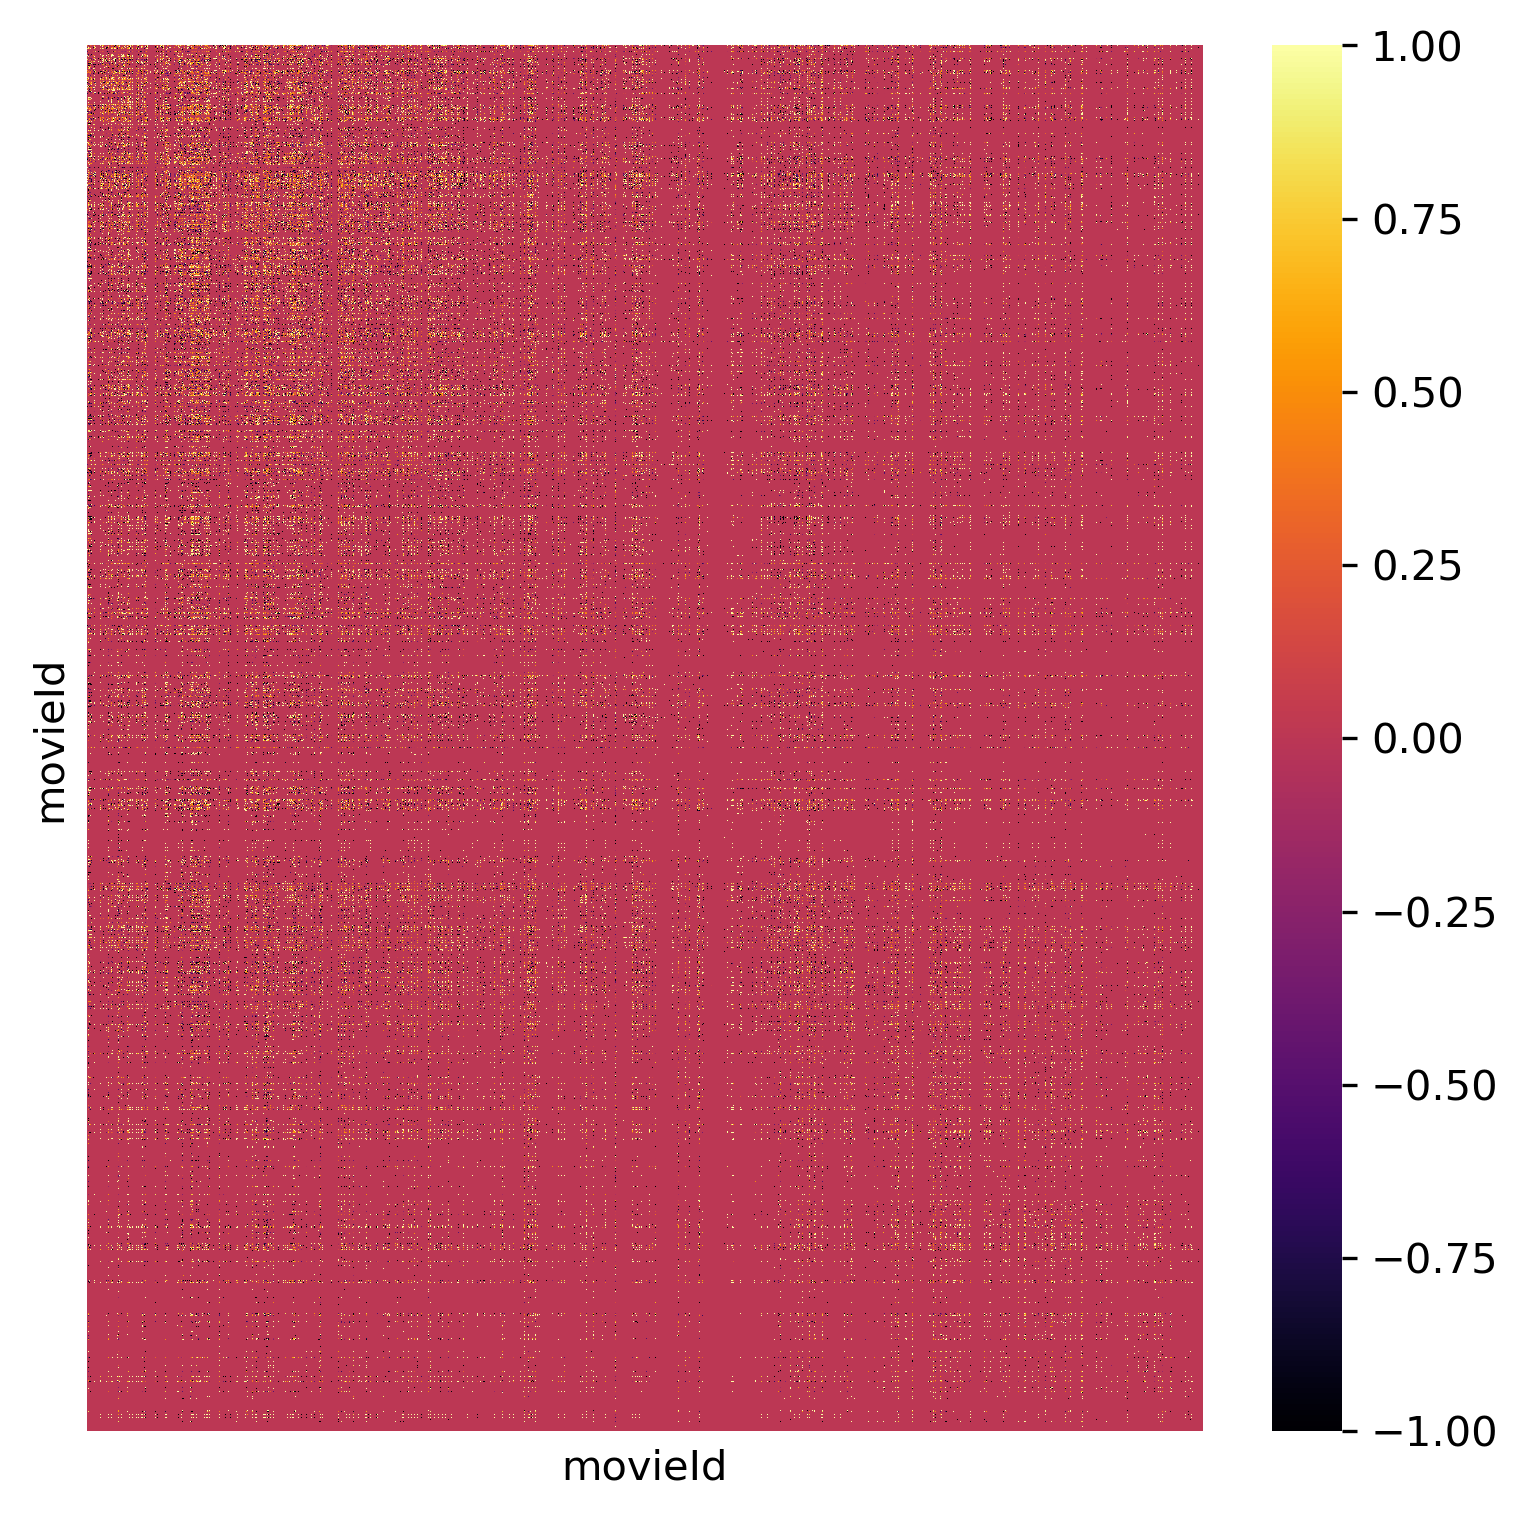

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix
plt.figure(figsize=(6, 6), dpi = 300)
sns.heatmap(item_item_similarity, cmap = "inferno",annot=False)
plt.xticks([])
plt.yticks([]) 
plt.show()

In [ ]:
def recommend_top5(title):
    # Get the movieId for the given title
    movie_id = movies.loc[movies['title'] == title, 'movieId'].values[0]
    # Get the similarity scores for the given movie
    sim_scores = item_item_similarity[movie_id]
    # Sort the similarity scores in descending order
    sim_scores = sim_scores.sort_values(ascending=False)
    # Get the top-5 similar movieIds
    top_5_movie_ids = sim_scores.index[1:6]
    # Get the titles of the top-5 similar movies
    top_5_titles = movies.loc[movies['movieId'].isin(top_5_movie_ids), 'title']
    
    return top_5_titles

# Example usage
recommend_top5('Toy Story (1995)')

1467                       Child's Play 2 (1990)
4158                          Quicksilver (1986)
4190                                Amen. (2002)
5277    Bachelor and the Bobby-Soxer, The (1947)
6141                           Date Movie (2006)
Name: title, dtype: object

In [73]:
# Evaluate the recommendation systems with MAE
from sklearn.metrics import mean_absolute_error

# Couldn't find the test data

User based similarity

In [85]:
# Compute the Pearson correlation matrix for users
user_pivot_table = ratings.pivot(index='userId', columns='movieId', values='rating')
user_user_similarity = pivot_table.T.corr(method='pearson')
user_user_similarity.fillna(0, inplace=True)

def find_top_similar_users(user_id, top_n=5):
    # Get the similarity scores for the given user
    sim_scores = user_user_similarity[user_id]
    # Sort the similarity scores in descending order
    sim_scores = sim_scores.sort_values(ascending=False)
    # Get the top-n similar userIds
    top_n_user_ids = sim_scores.index[1:top_n+1]
    
    return top_n_user_ids

# Example usage
find_top_similar_users(1)


Index([598, 106, 146, 333, 550], dtype='int64', name='userId')

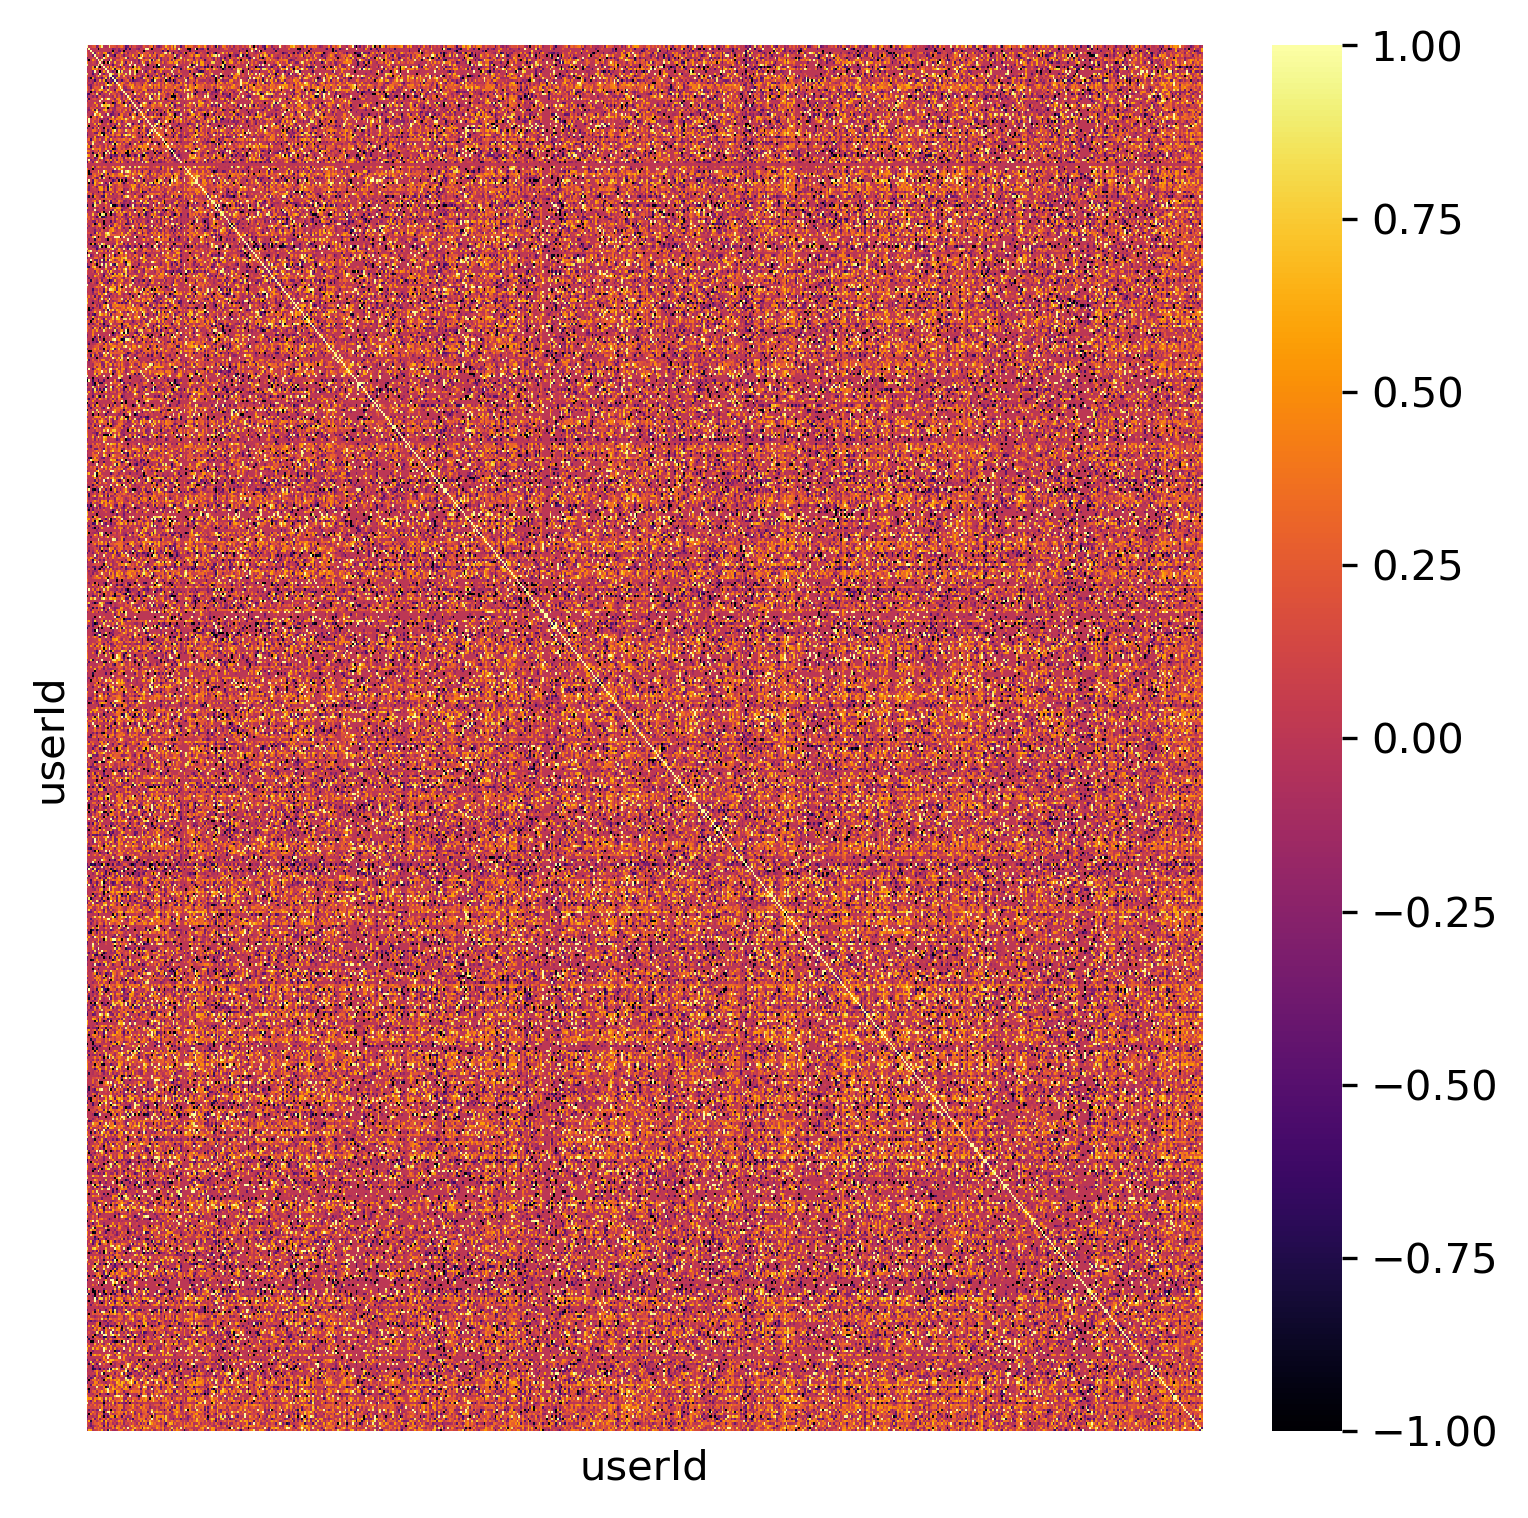

In [86]:
# user based heat map
plt.figure(figsize=(6, 6), dpi = 300)
sns.heatmap(user_user_similarity, cmap = "inferno",annot=False)
plt.xticks([])
plt.yticks([])
plt.show()